# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn

import torch.nn.functional as F
import numpy as np

import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset, DataLoader
import glob

from torchvision import datasets, transforms
from src.models import linear_vanilla_vae, denoising_vanilla_vae

from src.features import utils
import pathlib
import PIL
from torchvision.transforms import ToTensor, ToPILImage

import matplotlib.pyplot as plt

import json

In [2]:
import sys
sys.path.append('../../Vanilla_VAE_Denoising_Baseline/')

In [3]:
from divnoising import dataLoader as divnoising_dataloader
from divnoising import utils
from divnoising import training
from nets import model
from divnoising import histNoiseModel
from divnoising.utils import loadImages
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset, DataLoader

# Load Model

In [7]:
net = torch.load("/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline/unsupervised_patched_gaussian_64_dimensions-last_vae.net")

In [9]:
image_path = pathlib.Path("/home/fahad/master_thesis/data/simulated_noisy_templates_with_gaussian_noise/val/90_20_.png")
observation= ToTensor()(PIL.Image.open(image_path).convert("L"))
height=1536
width=1024
image_sample = observation.view(1,1,height,width).cuda()
output = utils.predictMMSE(image_sample, 10, net, size=(height, width))

/home/fahad/miniconda3/envs/vanilla_vae/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Text(0.5, 1.0, 'GT')

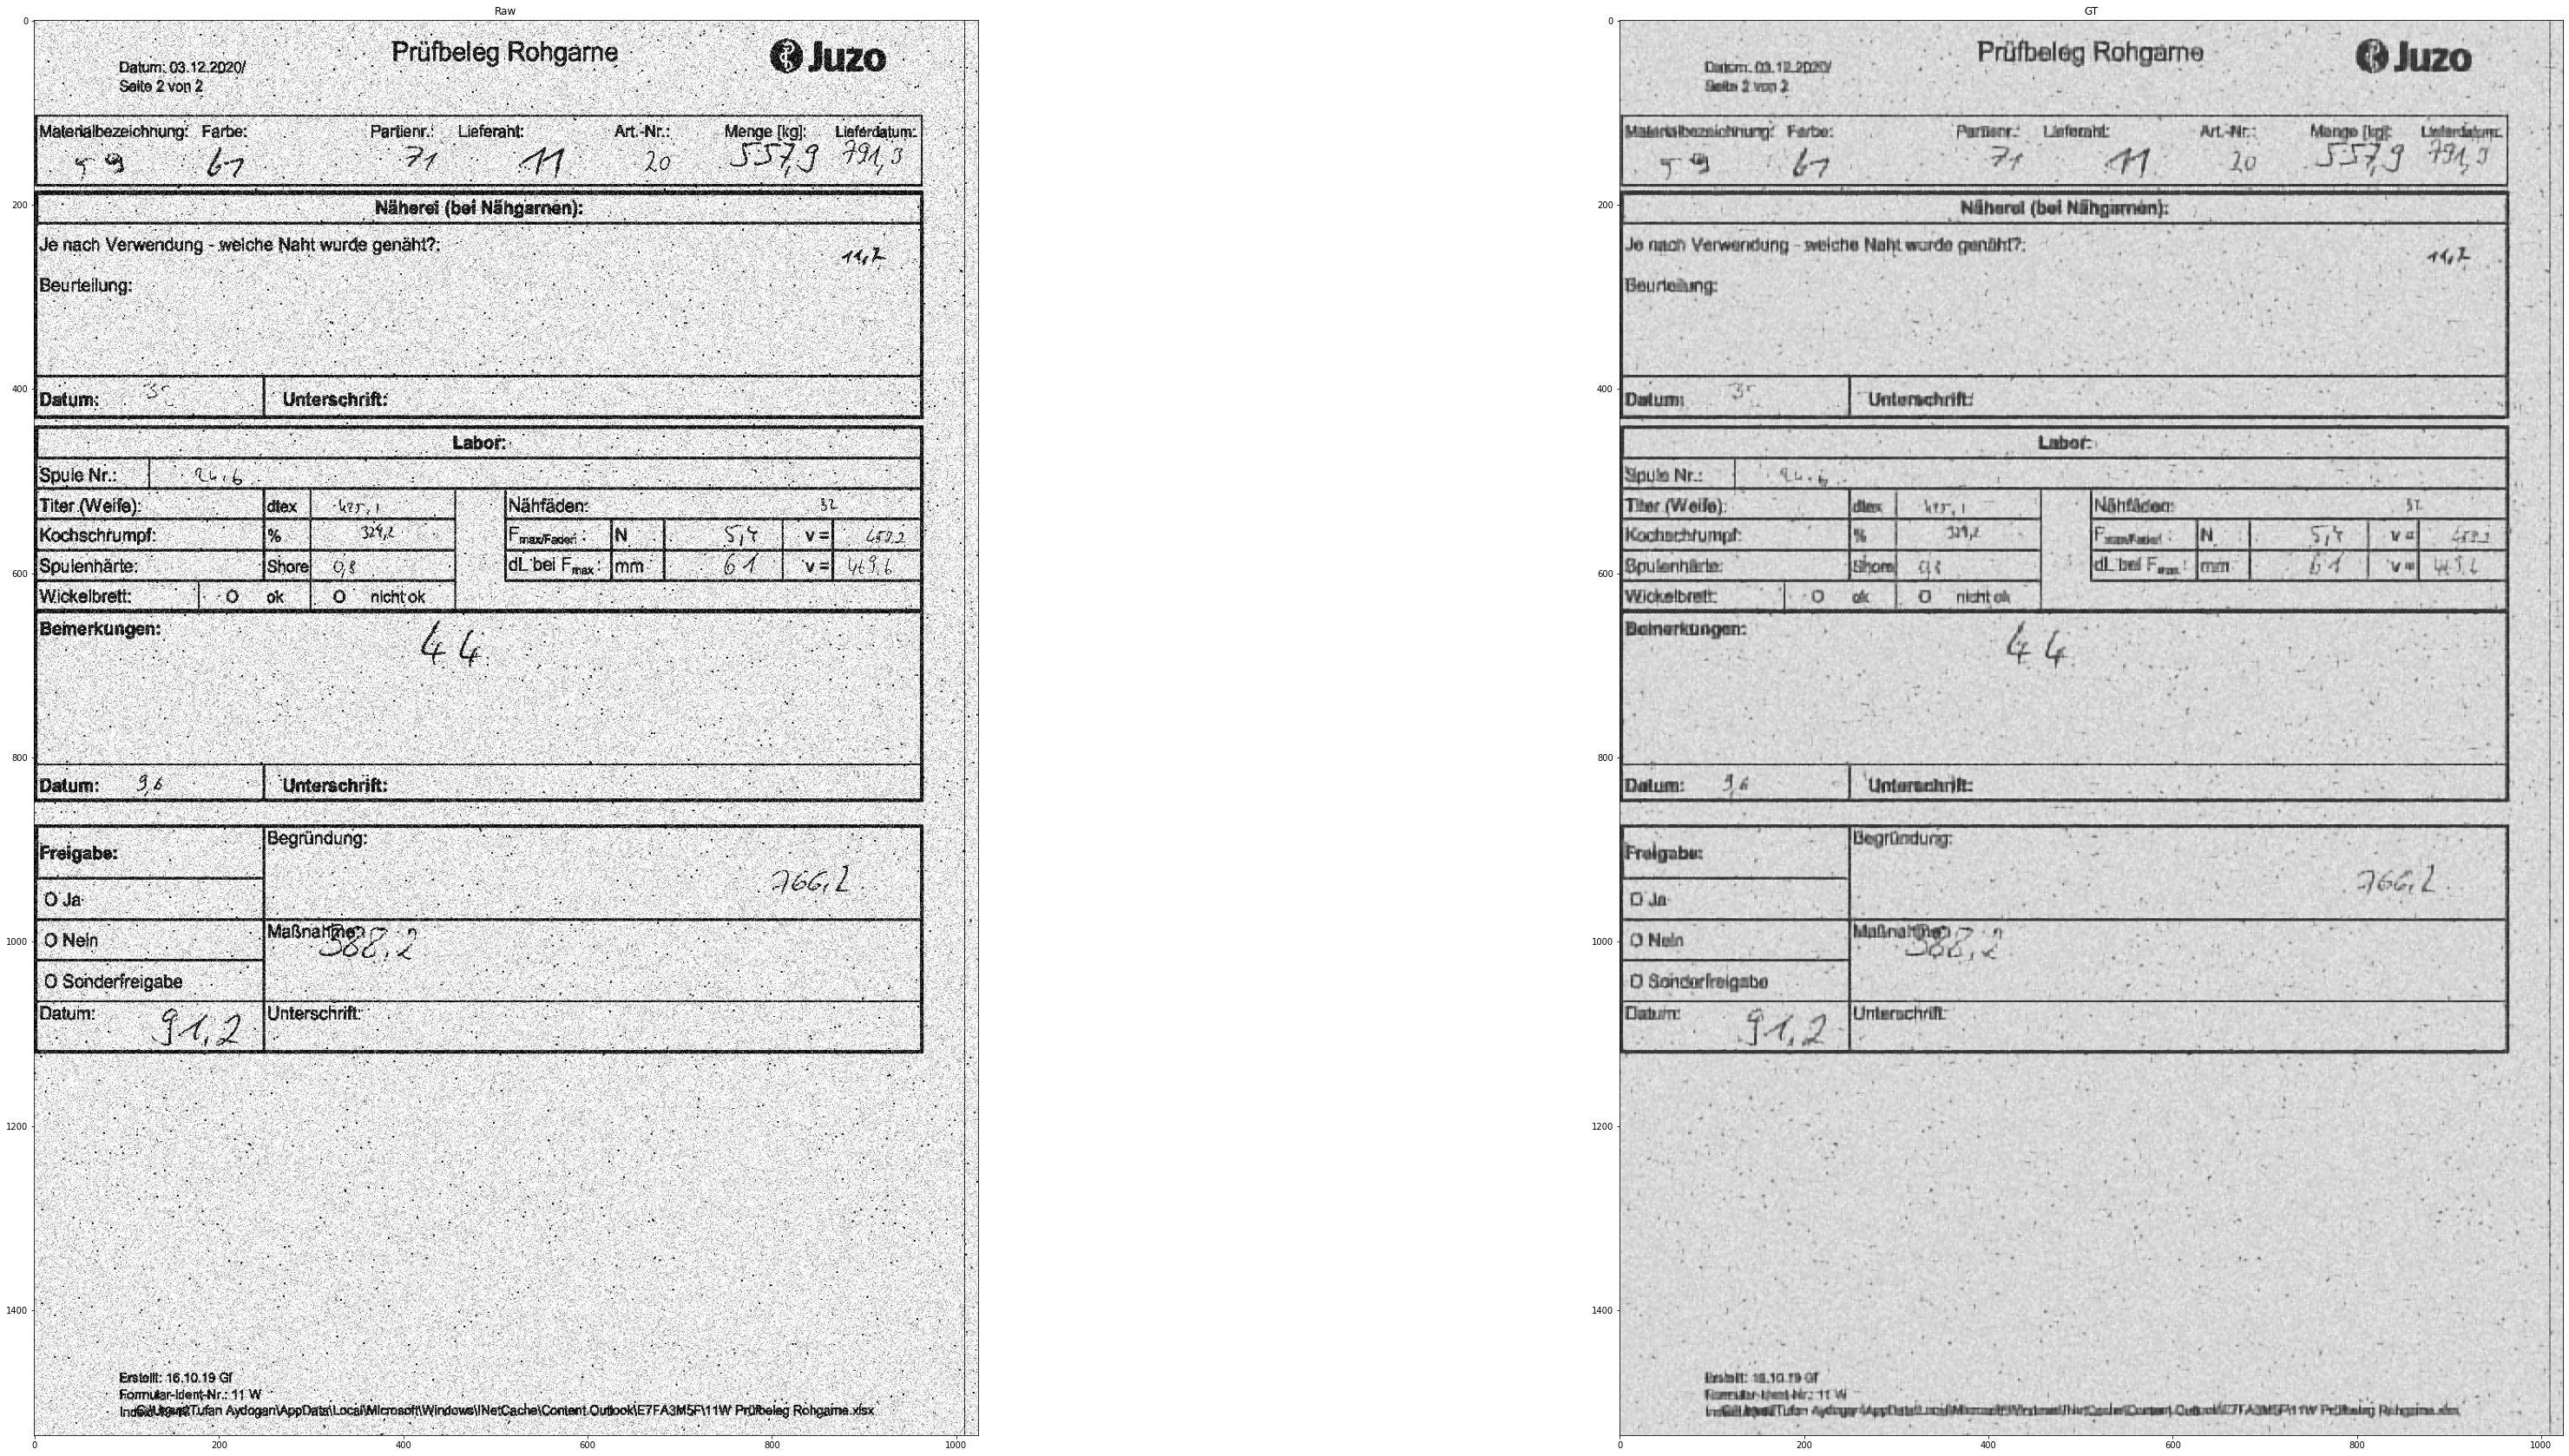

In [10]:
import matplotlib.pyplot as plt
image = plt.imread("/home/fahad/master_thesis/data/simulated_noisy_templates_with_gaussian_noise/val/90_20_.png")
fig=plt.figure(figsize=(60, 30)) 
fig.add_subplot(1, 2, 1)
plt.imshow(image,cmap='gray')
plt.title("Raw")
fig.add_subplot(1, 2, 2)
plt.imshow(output*255,cmap='gray')
plt.title("GT")

# Plot Losses

In [15]:
training_loss = np.load("/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline/patched_images/with_gaussian_noise/latent_space_64/train_loss.npy")
training_reconstruction_loss = np.load("/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline/patched_images/with_gaussian_noise/latent_space_64/train_reco_loss.npy")
training_kl_loss = np.load("/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline/patched_images/with_gaussian_noise/latent_space_64/train_kl_loss.npy")
val_loss = np.load("/home/fahad/master_thesis/vanilla_vae/models/unsupervised/Denoising_Baseline/patched_images/with_gaussian_noise/latent_space_64/val_loss.npy")

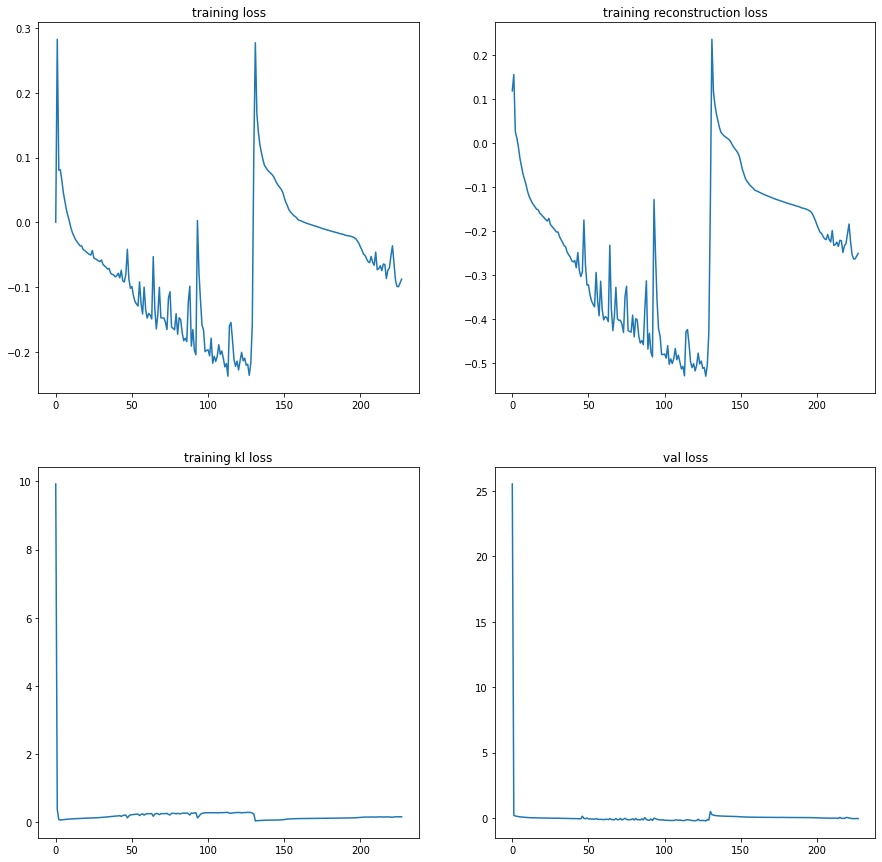

In [27]:


#Initialized to 0s. Actual values will be appended to matrix by function 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax[0, 0].plot(training_loss)
ax[0, 0].title.set_text("training loss")
ax[0, 1].plot(training_reconstruction_loss)
ax[0, 1].title.set_text("training reconstruction loss")
ax[1, 0].plot(training_kl_loss)
ax[1, 0].title.set_text("training kl loss")
ax[1, 1].plot(val_loss)
ax[1, 1].title.set_text("val loss")

plt.show()